<a href="https://colab.research.google.com/github/pkmariya/Python/blob/master/AerofitCaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Case Study


In [2]:
# import required librariies & packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

In [3]:
# import dataset

dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
aero_df = pd.read_csv(dataset_url)

In [ ]:
# Basic info of the dataset
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Description of the dataset
aero_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Size of the dataset
aero_df.size

1620

In [ ]:
# Shape of the dataset
aero_df.shape

(180, 9)

In [ ]:
# Column names in the dataset
aero_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# Data types of all the attributes
aero_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# top 5 rows from the dataset
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# bottom 5 rows
aero_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Check for Null values
aero_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Count of each products
product_cnt = aero_df['Product'].value_counts()
product_cnt

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Count of each products
product_cnt = {'Products Count ' : aero_df['Product'].value_counts()}
product_cnt = pd.DataFrame(product_cnt)
product_cnt

,Products Count
KP281,80
KP481,60
KP781,40


In [ ]:
# Customers count by age group
age_group_cnt = {'Age Count': aero_df['Age'].value_counts()}
age_group_cnt = pd.DataFrame(age_group_cnt)
age_group_cnt

,Age Count
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7
21,7


In [5]:
# Customers by Gender
gender_cnt = {'Male Female': aero_df['Gender'].value_counts()}
gender_cnt = pd.DataFrame(gender_cnt)
gender_cnt

,Male Female
Male,104
Female,76


In [16]:
# count_by_gender_by_age = aero_df(aero_df['Gender'] aero_df['Age']).value_counts()
gender_cnt = aero_df.loc[aero_df['Age']]
count_by_gender_by_age = gender_cnt['Gender']
count_by_gender_by_age

18    Female
19    Female
19    Female
19    Female
20      Male
       ...  
40      Male
42      Male
45    Female
47    Female
48      Male
Name: Gender, Length: 180, dtype: object

In [6]:
cust_mask = aero_df['Age']
cust_list = aero_df[cust_mask]
cust_list

KeyError: ignored

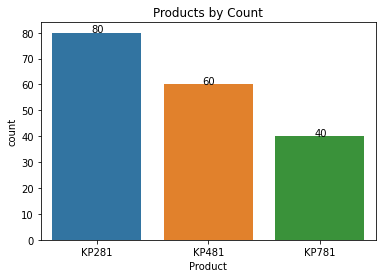

In [32]:
ax = sns.countplot(data=aero_df, x='Product')
plt.title("Products by Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

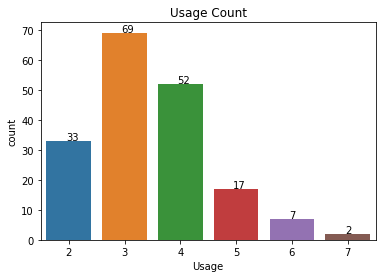

In [54]:
ax = sns.countplot(data=aero_df, x='Usage')
plt.title("Usage Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

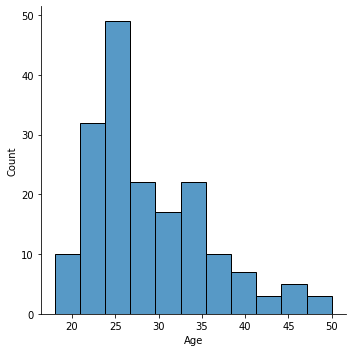

In [40]:
from pandas.core.ops.dispatch import Any
sns.displot(data=aero_df, x='Age')

plt.show()

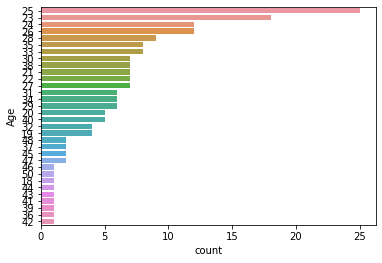

In [49]:
 sns.countplot(data=aero_df, y="Age", order=aero_df['Age'].value_counts().index[:]) 
 plt.show()


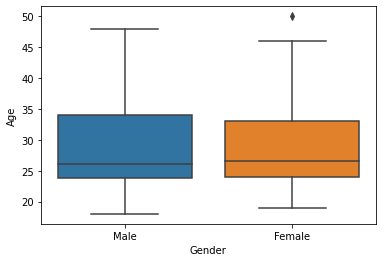

In [51]:
 sns.boxplot(data=aero_df, x='Gender', y='Age')
 plt.show()

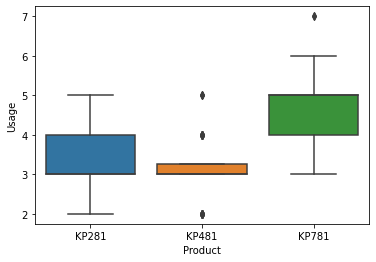

In [52]:
 sns.boxplot(data=aero_df, x='Product', y='Usage')
 plt.show()